# Problem #2B : Sentiment Analysis
The goal is to identify the best number of clusters that responses to the following question organize into using NLP methods:

"What one action can faculty take to improve your educational experience at UW?"

No assumptions are made about how many clusters (groups) these responses will fall into. The goal of
this portion of the NLP project is to identify the optimal number of clusters to support future coding of
these responses. 

This will be accomplished by representing the students' responses into three categories::
part A: topic, part B: sentiment analysis, and part B: semantic similarity.


In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

The main idea behind unsupervised learning is that you don’t give any previous assumptions and definitions to the model about the outcome of variables you feed into it — you simply insert the data (of course preprocessed before), and want the model to learn the structure of the data itself. It is extremely useful in cases when you don’t have labeled data, or you are not sure about the structure of the data, and you want to learn more about the nature of process you are analyzing, without making any previous assumptions about its outcome.

In [2]:
df = pd.read_csv('/Users/nehakardam/Documents/UWclasses /EE517 NLP/Project/FacultySupport_finaldata_June3_2021.csv')
df

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,B3.1_USStatus,B3.2_Country,B4.1_Race,B4.2,B5_Income,B6_GPA,B7_MotherEd,B8_FatherEd,B9_SocioClass,SA1
0,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,20,2,1,0,6,NaN,6,3.2,5,6,4,Restructure quizzes and stuff. In 235 we had a...
1,2,EE233_Spring2020,Spring,2020,4,1,2018,2022,19,1,1,0,1,NaN,7,3.23,5,4,5,"Flexible late turn in policies, especially in ..."
2,2,EE235_Spring2020,Spring,2020,2,1,2018,2022,19,2,1,0,8,NaN,8,3.4,3,5,5,Leniency on deadlines. It can be hard to stay...
3,2,EE331_Spring2020,Spring,2020,3,1,2018,2022,19,1,1,0,1,NaN,,3.81,6,7,,be flexible to possible changes and take stude...
4,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,19,2,3,1,1,NaN,4,3.55,4,6,5,have some strict action to make sure every stu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1,EE271_Spring2018,Spring,2018,2,1,2016,2019,19,2,1,NaN,1,Middle east,8,3.40,4,7,5,Be more clear on what they want when grading a...
1149,1,EE271_Spring2018,Spring,2018,2,1,2016,2020,19,2,1,NaN,8,,5,3.71,6,7,4,"When giving assignments, clarification on exac..."
1150,1,EE271_Spring2018,Spring,2018,2,1,2016,NaN,20,2,1,NaN,1,NaN,7,3.64,6,5,4,Give sample exams
1151,1,EE271_Spring2018,Spring,2018,3,1,2017,2020,18,1,1,NaN,1,NaN,5,3.77,3,2,3,"Being there for students outside of class, whe..."


# NLTK
NLTK’s Vader sentiment analysis tool uses a bag of words approach (a lookup table of positive and negative words) with some simple heuristics (e.g. increasing the intensity of the sentiment if some words like “really”, “so” or “a bit” are present).

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for i in range(df.shape[0]):
    s = str(df.SA1[i])
    print(sid.polarity_scores(s))
    

{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.6115}
{'neg': 0.15, 'neu': 0.734, 'pos': 0.116, 'compound': 0.031}
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.2263}
{'neg': 0.124, 'neu': 0.826, 'pos': 0.05, 'compound': -0.5267}
{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.2023}
{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.7717}
{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.6486}
{'neg': 0.041, 'neu': 0.823, 'pos': 0.136, 'compound': 0.7083}
{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.0772}
{'neg': 0.106, 'neu': 0.673, 'pos': 0.221, 'compound': 0.4432}
{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.6597}
{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'compound': -0.3318}
{'neg': 0.068, 'neu': 0.815, 'pos': 0.117, 'compound': 0.2023}
{'neg': 0.031, 'neu': 0.88, 'pos': 0.09, 'compound': 0.4767}
{'neg': 0.057, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.3818}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.7783}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.7906}
{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}
{'neg': 0.209, 'neu': 0.49, 'pos': 0.301, 'compound': 0.0828}
{'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}
{'neg': 0.061, 'neu': 0.8, 'pos': 0.139, 'compound': 0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.3818}


In [4]:
new_table = []

for i in range(df.shape[0]):
    s = str(df.SA1[i])
    d = sid.polarity_scores(s)
    new_row = [d['neg'],d['neu'],d['pos'],d['compound']]
    new_table.append(new_row)
new_df = pd.DataFrame(new_table, columns=['Negative', 'Neutral', 'Positive', 'Compound'])

In [5]:
result = pd.concat([df, new_df], axis=1)
result

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B5_Income,B6_GPA,B7_MotherEd,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound
0,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,20,2,...,6,3.2,5,6,4,Restructure quizzes and stuff. In 235 we had a...,0.000,0.899,0.101,0.4019
1,2,EE233_Spring2020,Spring,2020,4,1,2018,2022,19,1,...,7,3.23,5,4,5,"Flexible late turn in policies, especially in ...",0.000,0.844,0.156,0.6115
2,2,EE235_Spring2020,Spring,2020,2,1,2018,2022,19,2,...,8,3.4,3,5,5,Leniency on deadlines. It can be hard to stay...,0.150,0.734,0.116,0.0310
3,2,EE331_Spring2020,Spring,2020,3,1,2018,2022,19,1,...,,3.81,6,7,,be flexible to possible changes and take stude...,0.000,0.872,0.128,0.2263
4,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,19,2,...,4,3.55,4,6,5,have some strict action to make sure every stu...,0.124,0.826,0.050,-0.5267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1,EE271_Spring2018,Spring,2018,2,1,2016,2019,19,2,...,8,3.40,4,7,5,Be more clear on what they want when grading a...,0.000,0.656,0.344,0.4927
1149,1,EE271_Spring2018,Spring,2018,2,1,2016,2020,19,2,...,5,3.71,6,7,4,"When giving assignments, clarification on exac...",0.000,0.552,0.448,0.7579
1150,1,EE271_Spring2018,Spring,2018,2,1,2016,NaN,20,2,...,7,3.64,6,5,4,Give sample exams,0.000,1.000,0.000,0.0000
1151,1,EE271_Spring2018,Spring,2018,3,1,2017,2020,18,1,...,5,3.77,3,2,3,"Being there for students outside of class, whe...",0.000,0.788,0.212,0.7783


In [6]:
result.to_csv(r'/Users/nehakardam/Documents/UWclasses /EE517 NLP/Project/FS_Sentiment_SA1_June2_2021.csv', index = False)

# Textblob
Textblob’s Sentiment Analysis works in a similar way to NLTK — using a bag of words classifier, but the advantage is that it includes Subjectivity Analysis too (how factual/opinionated a piece of text is)! 
However, it doesn’t contain the heuristics that NLTK has, and so it won’t intensify or negate a sentence’s sentiment.

In [7]:
# !pip install -U textblob
# !python -m textblob.download_corpora

In [8]:
from textblob import TextBlob

for i in range(df.shape[0]):
    s = str(df.SA1[i])
    print(TextBlob(s).sentiment)

Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.186, subjectivity=0.6300000000000001)
Sentiment(polarity=-0.2916666666666667, subjectivity=0.5416666666666666)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.11666666666666665, subjectivity=0.662962962962963)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.13333333333333333, subjectivity=0.6)
Sentiment(polarity=0.1605218855218855, subjectivity=0.4162457912457913)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5316666666666667, subjectivity=0.75)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.4666666666666667, subjectivity=0.6666666666666667)
Sentiment(polarity=-0.1375, subjectivity=0.575)
Sentiment(polarity=0.0, subjectivity=0.7000000000000001)
Sentiment(polarity=0.07857142857142858, subjectivity=0.46785714285714286)
Sentiment(polarity=0.33999999999999997, subjectivity=0.54)
Sentiment(polarity=0.5, subjectivity=0.5)
Sen

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.18611111111111112, subjectivity=0.26944444444444443)
Sentiment(polarity=0.2583333333333333, subjectivity=0.325)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.4)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.20625, subjectivity=0.4472222222222222)
Sentiment(polarity=0.5333333333333333, subjectivity=0.6666666666666666)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.049999999999999996, subjectivity=0.6833333333333332)
Sentiment(polarity=0.0, subjectivity=0.5625)
Sentiment(polarity=0.15833333333333333, subjectivity=0.41944444444444445)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.04642857142857143, subjectivity=0.6678571428571429)
Sentiment(polarity=-0.075,

In [9]:
new_table1 = []
for i in range(df.shape[0]):
    s1 = str(df.SA1[i])
    d1 = TextBlob(s1).sentiment
    new_row1 = [d1.polarity,d1.subjectivity]
    new_table1.append(new_row1)
new_df1 = pd.DataFrame(new_table1, columns=['polarity', 'subjectivity'])

In [10]:
result1 = pd.concat([result, new_df1], axis=1)
result1

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B7_MotherEd,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound,polarity,subjectivity
0,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,20,2,...,5,6,4,Restructure quizzes and stuff. In 235 we had a...,0.000,0.899,0.101,0.4019,0.000000,1.000000
1,2,EE233_Spring2020,Spring,2020,4,1,2018,2022,19,1,...,5,4,5,"Flexible late turn in policies, especially in ...",0.000,0.844,0.156,0.6115,0.186000,0.630000
2,2,EE235_Spring2020,Spring,2020,2,1,2018,2022,19,2,...,3,5,5,Leniency on deadlines. It can be hard to stay...,0.150,0.734,0.116,0.0310,-0.291667,0.541667
3,2,EE331_Spring2020,Spring,2020,3,1,2018,2022,19,1,...,6,7,,be flexible to possible changes and take stude...,0.000,0.872,0.128,0.2263,0.000000,1.000000
4,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,19,2,...,4,6,5,have some strict action to make sure every stu...,0.124,0.826,0.050,-0.5267,0.116667,0.662963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1,EE271_Spring2018,Spring,2018,2,1,2016,2019,19,2,...,4,7,5,Be more clear on what they want when grading a...,0.000,0.656,0.344,0.4927,0.300000,0.441667
1149,1,EE271_Spring2018,Spring,2018,2,1,2016,2020,19,2,...,6,7,4,"When giving assignments, clarification on exac...",0.000,0.552,0.448,0.7579,0.525000,0.500000
1150,1,EE271_Spring2018,Spring,2018,2,1,2016,NaN,20,2,...,6,5,4,Give sample exams,0.000,1.000,0.000,0.0000,0.000000,0.000000
1151,1,EE271_Spring2018,Spring,2018,3,1,2017,2020,18,1,...,3,2,3,"Being there for students outside of class, whe...",0.000,0.788,0.212,0.7783,0.125000,0.400000


# Flair
Flair’s sentiment classifier is based on a character-level LSTM neural network which takes sequences of letters and words into account when predicting

In [11]:
# !pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')


for i in range(df.shape[0]):
    s2 = str(df.SA1[i])
    sentence = flair.data.Sentence(s2)
    flair_sentiment.predict(sentence)
    total_sentiment = sentence.labels
    print(sentence)
    print(str(sentence.labels[0]).split()[0])

2021-06-08 09:50:35,805 loading file /Users/nehakardam/.flair/models/sentiment-en-mix-distillbert_4.pt
Sentence: "Restructure quizzes and stuff . In 235 we had a weekly quiz in lieu of midterms and a final , and that helped keep people engaged and paying attention ."   [− Tokens: 30  − Sentence-Labels: {'label': [POSITIVE (0.9288)]}]
POSITIVE
Sentence: "Flexible late turn in policies , especially in my area my wifi is very inconsistent so it would be very nice if professors could be aware and understanding of that ."   [− Tokens: 31  − Sentence-Labels: {'label': [POSITIVE (0.9625)]}]
POSITIVE
Sentence: "Leniency on deadlines . It can be hard to stay motivated during these times without dedicated study spaces . Some have inconsistent internet connections ."   [− Tokens: 25  − Sentence-Labels: {'label': [NEGATIVE (0.9995)]}]
NEGATIVE
Sentence: "be flexible to possible changes and take student feedback into account to change / adj0t assignments / pacing"   [− Tokens: 18  − Sentence-Labels

Sentence: "More office hours would be nice . Flexible with due dates , which he already does !"   [− Tokens: 17  − Sentence-Labels: {'label': [POSITIVE (0.9957)]}]
POSITIVE
Sentence: "Lenient grading and a lot of opportunities to ask questions"   [− Tokens: 10  − Sentence-Labels: {'label': [NEGATIVE (0.8747)]}]
NEGATIVE
Sentence: "Dont make the class about the grade . That 's stupid and does n't facilitate learning . Also the competitive nature between peers is not actually what happens in the work place . So creating an environment where students work together to succeed would be better instead of competition ."   [− Tokens: 50  − Sentence-Labels: {'label': [NEGATIVE (1.0)]}]
NEGATIVE
Sentence: "Provide additional help with homework , more review sessions before exams , detailed study guide , more time to complete homework assignments ."   [− Tokens: 23  − Sentence-Labels: {'label': [POSITIVE (0.891)]}]
POSITIVE
Sentence: "The average on our midterms has been really high . I do n't th

Sentence: "Being more forgiving and lenient with deadlines where possible and within reason . With everything shifting to online and being stuck at home , things get chaotic without much privacy and I am not 0ed to handling so many things from an online environment . Issues at home become large distractions that are normally not an issue when physically attending class ."   [− Tokens: 62  − Sentence-Labels: {'label': [NEGATIVE (0.9971)]}]
NEGATIVE
Sentence: "Giving extra credits to students who attend the class lecture regularly ."   [− Tokens: 12  − Sentence-Labels: {'label': [POSITIVE (0.9958)]}]
POSITIVE
Sentence: "be flexible in structure ( due dates , lecture style , labs ) to student feedback"   [− Tokens: 16  − Sentence-Labels: {'label': [POSITIVE (0.9273)]}]
POSITIVE
Sentence: "Not providing traditional exams in online formats , or at least minimizing their effects on grades . It is extremely difficult for myself and many other students to concentrate and perform exams under th

Sentence: "I would like professors to be understanding of external situations when it comes to assigning work in an online quarter . I feel as though with the challenge of teaching with an online quarter , professors are more apt to assign more work or require the learning of additional material outside of lecture whether that be in the form of requiring outside research to answer homework or needing lessons within office hours to learn how to do the labs . With the stress of the conflicts in the world currently , for many of us there may be things that require our attention outside of school , and since this online quarter has required students to do more work and learn more course format outside of class , it can cause conflicts between our academics and areas where we need to focus outside of school . I think it would be best to teach the required course format needed to succeed in the class within the lectures and quiz sections so students can have a better expectation of the workl

Sentence: "provide more examples at a slower pace describing where the equations are comping from and why we can use them ."   [− Tokens: 21  − Sentence-Labels: {'label': [NEGATIVE (0.9937)]}]
NEGATIVE
Sentence: "To go over homework problems in class and to teach slowly and not rush things"   [− Tokens: 15  − Sentence-Labels: {'label': [POSITIVE (0.999)]}]
POSITIVE
Sentence: "Posting lectures for the general information / format of the class and then using the scheduled class time for going through specific examples / problems and answering student questions ."   [− Tokens: 30  − Sentence-Labels: {'label': [POSITIVE (0.8738)]}]
POSITIVE
Sentence: "First of all , they should be required to have a live lecture which they can then record for students who were n't able to make the live . One of my professors has no live lectures , they only record a lecture , and its the literal dumbest waste of my money . Having live lectures at least makes one interact with the class , feel like they 're

Sentence: "I think that the office hours are great . Every time I go she always greeets me witha very positve and conforting atmosphere . I think that the lectures could be more fast past paced . At times there is a lot of over clarification when in reality it is not a very complicated concept . Difficult concepts are gone over too quickly and are only undertstandable to those with prior knowledge ."   [− Tokens: 73  − Sentence-Labels: {'label': [POSITIVE (0.7515)]}]
POSITIVE
Sentence: "Do example problems relevant to the course / homework in class . Hold frequent office hours , ask questions to the class so the class could answer them if we are working on a problem . Maybe ask if students were able to solve a problem a different way and explain how they solved it in class to the class ."   [− Tokens: 61  − Sentence-Labels: {'label': [POSITIVE (0.9456)]}]
POSITIVE
Sentence: "I think providing more practice in class and class engagement . That is difficult in such a large class but I fe

Sentence: "Going through examples is one of the most helpful ways to solidify the material . I would also recommend not requiring in class attendance , sometimes the class moves by slowly , which is n't always a bad thing , but especially later in the quarter it is very easy to zone out . Being in control of when we learn as the students might lead to an increase in the effectiveness of the lectures ."   [− Tokens: 76  − Sentence-Labels: {'label': [POSITIVE (0.9604)]}]
POSITIVE
Sentence: "I would be more organized in the handwritten examples related to the problems in slides as sometimes is was difficult to find the solving for the examples ."   [− Tokens: 28  − Sentence-Labels: {'label': [NEGATIVE (0.9985)]}]
NEGATIVE
Sentence: "The main action would be to slow the pace of lectures when the concept is very complex . However , this is not the main one . Another action that professors should take is making sure they are giving more background to the information , for example not j0t rea

Sentence: "Give in-class exercise sheet to help students understand the material"   [− Tokens: 10  − Sentence-Labels: {'label': [POSITIVE (0.951)]}]
POSITIVE
Sentence: "give great example problems on difficult concepts"   [− Tokens: 7  − Sentence-Labels: {'label': [POSITIVE (0.8394)]}]
POSITIVE
Sentence: "One action that would be nice is to create a comfortable environment in which a student can learn at their own pace without being probed at with questions that they are not able to answer yet ."   [− Tokens: 37  − Sentence-Labels: {'label': [POSITIVE (0.567)]}]
POSITIVE
Sentence: "Having in class assignments"   [− Tokens: 4  − Sentence-Labels: {'label': [POSITIVE (0.9759)]}]
POSITIVE
Sentence: "Go through a tough problem"   [− Tokens: 5  − Sentence-Labels: {'label': [NEGATIVE (0.8704)]}]
NEGATIVE
Sentence: "In class problems"   [− Tokens: 3  − Sentence-Labels: {'label': [NEGATIVE (0.9962)]}]
NEGATIVE
Sentence: "Do more complicated design problem in class"   [− Tokens: 7  − Sentence-La

Sentence: "I love review days . These help compress lengthy hour long lectures into short chunks of vital information , and can remind students of information they might have forgotten due to maybe learning about it at the beginning of the year , then never touching it again ."   [− Tokens: 48  − Sentence-Labels: {'label': [POSITIVE (0.9994)]}]
POSITIVE
Sentence: "Make sure that if a topic is going to be put on a test that it is covered in lecture and made clear for everyone of its importance and is taught well ."   [− Tokens: 33  − Sentence-Labels: {'label': [POSITIVE (0.9923)]}]
POSITIVE
Sentence: "- Present the material well . Basically be a good lecturer . Write out notes if it fits better than slides , or vice versa . When asked questions , answer them clearly and concisely as possible . ( Professor jones does this pretty well ) - note important things when going over new material even if it ’s somewhat redundant ( ie this is THIS because THIS )"   [− Tokens: 69  − Sentence-Labels

Sentence: "Make the lectures relevant to the homework and the exams . Shorter Quiz sections will be helpful as well ."   [− Tokens: 20  − Sentence-Labels: {'label': [POSITIVE (0.9922)]}]
POSITIVE
Sentence: "Going over examples in class is the best way to make sure material is retained"   [− Tokens: 15  − Sentence-Labels: {'label': [POSITIVE (0.9943)]}]
POSITIVE
Sentence: "The most helpful action professors at UW can take to support me in class is to go through examples in lecture that are at least somewhat similar to homework and test problems ."   [− Tokens: 33  − Sentence-Labels: {'label': [POSITIVE (0.9685)]}]
POSITIVE
Sentence: "Give an outline of what we are about to cover and were we are going so that we can get a clear goal in mind ."   [− Tokens: 26  − Sentence-Labels: {'label': [POSITIVE (0.9828)]}]
POSITIVE
Sentence: "Give an overview of what will be taught at the beginning of class"   [− Tokens: 13  − Sentence-Labels: {'label': [POSITIVE (0.9976)]}]
POSITIVE
Sentence: "Thoro

Sentence: "Waste less class time answering a ton on individual student questions during class time . It often felt like every 30 seconds some student would interupt the lecture with a question to clarify something that I did n't need and made it hard to actualy learn anything . In person classes have far less student questions and when students are conf0ed they can go to office hours rather than having professors waste my time answering every little question that comes up . Beca0e of this I stopped watching lectures after week 3 to j0t read the book instead ."   [− Tokens: 99  − Sentence-Labels: {'label': [NEGATIVE (1.0)]}]
NEGATIVE
Sentence: "The professors should try to get the class more involved . All of my professors are open to 0 asking questions , but there is n't a lot of other involvement . Many students do n't feel comfortable interrupting the professor to ask a question ."   [− Tokens: 46  − Sentence-Labels: {'label': [NEGATIVE (0.9971)]}]
NEGATIVE
Sentence: "Leave space for

Sentence: "Be clear and organized ."   [− Tokens: 5  − Sentence-Labels: {'label': [POSITIVE (0.9778)]}]
POSITIVE
Sentence: "care about the students and activity engage in wanting us to learn , making material as interesting and engaging the class and being positive and happy people"   [− Tokens: 27  − Sentence-Labels: {'label': [POSITIVE (0.9959)]}]
POSITIVE
Sentence: "By being clear and concise in lectures . Profs going off on tangents wastes class time and can further confuse students ."   [− Tokens: 22  − Sentence-Labels: {'label': [NEGATIVE (0.9995)]}]
NEGATIVE
Sentence: "One action the professors can take would be having well written lecture slides that are easy to follow and practice exams that reflect their coursework ."   [− Tokens: 26  − Sentence-Labels: {'label': [NEGATIVE (0.9448)]}]
NEGATIVE
Sentence: "Be understanding of unforeseen circumstances related to technology ; provide lecture recordings ; scale projects accordingly"   [− Tokens: 16  − Sentence-Labels: {'label': [P

Sentence: "I think that the professors willingness to work with students to find what works best with 0 was helpful to me and I am sure a lot of other students ."   [− Tokens: 31  − Sentence-Labels: {'label': [POSITIVE (0.9646)]}]
POSITIVE
Sentence: "Being flexible and accomodating to any problems that may come up"   [− Tokens: 11  − Sentence-Labels: {'label': [POSITIVE (0.9973)]}]
POSITIVE
Sentence: "Time flexibility"   [− Tokens: 2  − Sentence-Labels: {'label': [POSITIVE (0.7595)]}]
POSITIVE
Sentence: "Write notes clearly by verbally explaining each variable and explain what your writing as your doing it ."   [− Tokens: 18  − Sentence-Labels: {'label': [POSITIVE (0.9984)]}]
POSITIVE
Sentence: "Make it less stressful"   [− Tokens: 4  − Sentence-Labels: {'label': [POSITIVE (0.9986)]}]
POSITIVE
Sentence: "be engaging ... show some cool live examples or something . dry zoom lectures are so last month ."   [− Tokens: 19  − Sentence-Labels: {'label': [POSITIVE (0.9461)]}]
POSITIVE
Sentence

Sentence: "Be flexible and check email often"   [− Tokens: 6  − Sentence-Labels: {'label': [POSITIVE (0.8148)]}]
POSITIVE
Sentence: "To be more clear in lecture , lecture is a little slow and can get tedio0 . Different expressions and representations of the material will help deepen the learning ."   [− Tokens: 30  − Sentence-Labels: {'label': [NEGATIVE (0.9973)]}]
NEGATIVE
Sentence: "Make the lectures as interesting as possible ."   [− Tokens: 8  − Sentence-Labels: {'label': [POSITIVE (0.9986)]}]
POSITIVE
Sentence: "I am not too sure if this is possible , but maybe give students the licensing for MultiSim and available external hard drives for high-memory demanding tasks so that students can perform lab assignment with equal accessibility to the same technology . Also , send students the lab kit so that students can maybe build circuits that they can potentially 0e even when other equipment is not available at the moment but maybe 0e after the COVID-19 lock-down is lifted ."   [− Toke

Sentence: "The number one action to best support me in my classes is to provide lectures prerecorded along with the notes or the slides from the lecture . I find live zoom courses to be very difficult . The chat is very distracting and internet troubles can cause material to be missed which is very stressful . Providing this prerecorded is much more helpful and relaxing to view the lectures and stop as needed or sometimes even to speed up . If I have questions , I can go to office hours ."   [− Tokens: 92  − Sentence-Labels: {'label': [NEGATIVE (0.5516)]}]
NEGATIVE
Sentence: "Recorded lectures Quizzes that match the material"   [− Tokens: 7  − Sentence-Labels: {'label': [POSITIVE (0.9837)]}]
POSITIVE
Sentence: "Honestly j0t make everything as flexible with time as possible — offering lecture recordings so you do n’t have to watch live and posting lecture slides is really helpful . Also midterms + final is better to me then the quizzes ."   [− Tokens: 42  − Sentence-Labels: {'label': [P

Sentence: "Providing ya with resources such as copies of notes or recordings of lectures to look back on if we need to . Also posting older exams to help us prep for upcoming exams"   [− Tokens: 33  − Sentence-Labels: {'label': [POSITIVE (0.7689)]}]
POSITIVE
Sentence: "Students needs as much access to necessary academic materials as possible . Professors should share all lecture slides , in class notes , and record lectures ."   [− Tokens: 27  − Sentence-Labels: {'label': [POSITIVE (0.9761)]}]
POSITIVE
Sentence: "Provide video lectures and lecture slides ."   [− Tokens: 7  − Sentence-Labels: {'label': [POSITIVE (0.9776)]}]
POSITIVE
Sentence: "Providing good resources to understand the lectures for example lecture slides , lecture recordings , etc . They should also make sure that students can understand them ."   [− Tokens: 28  − Sentence-Labels: {'label': [POSITIVE (0.9855)]}]
POSITIVE
Sentence: "Record the lectures"   [− Tokens: 3  − Sentence-Labels: {'label': [POSITIVE (0.9937)]}]
P

Sentence: "record lectures and upload them on canvas , as well as creating practice tests"   [− Tokens: 14  − Sentence-Labels: {'label': [POSITIVE (0.9957)]}]
POSITIVE
Sentence: "Give a well-structured canvas page with abundant extra study materials and resources , offer office hours ."   [− Tokens: 17  − Sentence-Labels: {'label': [POSITIVE (0.9955)]}]
POSITIVE
Sentence: "Provide as many avenues ( ways to access and learn ) their content as possible , such as posting lectures , posting panaptos , giving recommended reading , problems ( SUGGESTED problems are super useful ) ."   [− Tokens: 37  − Sentence-Labels: {'label': [POSITIVE (0.9555)]}]
POSITIVE
Sentence: "Posting lecture slides on canvas , as well as posting a lot of practice exams / problems before midterms and finals ."   [− Tokens: 22  − Sentence-Labels: {'label': [NEGATIVE (0.7611)]}]
NEGATIVE
Sentence: "Panopto the lectures and also post more practice tests"   [− Tokens: 9  − Sentence-Labels: {'label': [POSITIVE (0.9762)]}

Sentence: "Having lectures be asynchrono0 helps a lot beca0e I have even more trouble staying foc0ed in online lectures , so having the ability to go back over lectures is extremely helpful ."   [− Tokens: 32  − Sentence-Labels: {'label': [POSITIVE (0.9872)]}]
POSITIVE
Sentence: "By recording lectures and providing them on canvas ."   [− Tokens: 9  − Sentence-Labels: {'label': [POSITIVE (0.9799)]}]
POSITIVE
Sentence: "More supplement resources may need to help 0 understand the theories better and calculation better ."   [− Tokens: 16  − Sentence-Labels: {'label': [NEGATIVE (0.9976)]}]
NEGATIVE
Sentence: "Upload recordings of lectures and lecture slides ."   [− Tokens: 8  − Sentence-Labels: {'label': [POSITIVE (0.6946)]}]
POSITIVE
Sentence: "Pre record lectures , and then upload those to minimize connection issues ca0ing students to miss information ."   [− Tokens: 18  − Sentence-Labels: {'label': [NEGATIVE (0.6574)]}]
NEGATIVE
Sentence: "extra practice material is always the best . Ext

Sentence: "I would appreciate a reading guide . My professors typically suggest a textbook for the course , but they do not provide a guide for what sections will be covered during specific times of the quarter . A reading guide would be helpful beca0e it would ease my ability to read ahead . Sometimes it is easier to understand covered material by reading ahead ."   [− Tokens: 65  − Sentence-Labels: {'label': [NEGATIVE (0.9887)]}]
NEGATIVE
Sentence: "Some videos on real world examples would be good . For the most part it was pretty good the way it was presented ."   [− Tokens: 24  − Sentence-Labels: {'label': [POSITIVE (0.637)]}]
POSITIVE
Sentence: "Having a calendar / syllab0 laying out all the deadlines throughout the quarter ."   [− Tokens: 14  − Sentence-Labels: {'label': [NEGATIVE (0.9679)]}]
NEGATIVE
Sentence: "Less HW typos"   [− Tokens: 3  − Sentence-Labels: {'label': [POSITIVE (0.7441)]}]
POSITIVE
Sentence: "Providing recorded lectures is always helpful"   [− Tokens: 6  − Sen

Sentence: "Make sure they are clear at communicating due dates for assignments ."   [− Tokens: 12  − Sentence-Labels: {'label': [POSITIVE (0.9932)]}]
POSITIVE
Sentence: "Create organized modules that includes lecture videos and lecture slides if doing prerecorded lectures . Preferably host office hours on the days where there are n't lectures ( for mon,wed,fri lectures classes ) since some people like to only watch lecture videos on the scheduled class times and having office hours there would be a conflict ."   [− Tokens: 57  − Sentence-Labels: {'label': [POSITIVE (0.9983)]}]
POSITIVE
Sentence: "Give 0 assigned readings in the textbook"   [− Tokens: 7  − Sentence-Labels: {'label': [NEGATIVE (0.9997)]}]
NEGATIVE
Sentence: "I really appreciate professors that are consistent with the course format and due dates . It makes it easier to keep track of things if I know that every week there are these assignments that are due on the same day . I also think making announcements and having a we

Sentence: "Posting lecture notes would be useful - sometimes I have trouble writing everything down fast enough . It would be helpful to have a reference to look back on ."   [− Tokens: 30  − Sentence-Labels: {'label': [NEGATIVE (0.9966)]}]
NEGATIVE
Sentence: "Put out more applicable practice material earlier before tests"   [− Tokens: 9  − Sentence-Labels: {'label': [POSITIVE (0.746)]}]
POSITIVE
Sentence: "Posting an overview of what was discussed in class would be helpful . I do n't usually miss class , and I know that the teachers want students to attend class , but having access to notes about the day 's lecture will be extremely useful , even if they are not very detailed ."   [− Tokens: 55  − Sentence-Labels: {'label': [POSITIVE (0.9984)]}]
POSITIVE
Sentence: "Providing lecture materials online ( for students who miss class due to illness or emergencies )"   [− Tokens: 16  − Sentence-Labels: {'label': [POSITIVE (0.9564)]}]
POSITIVE
Sentence: "Post notes online ! My God , it 's in

Sentence: "I think that one of the most helpful things that a professor can do to help support student is to pick practice problems and provide many practice tests"   [− Tokens: 28  − Sentence-Labels: {'label': [POSITIVE (0.9758)]}]
POSITIVE
Sentence: "Offer more resources for studying such as previous tests ( and answers ) as well as study guides ."   [− Tokens: 19  − Sentence-Labels: {'label': [POSITIVE (0.8156)]}]
POSITIVE
Sentence: "Giving more examples and worksheets to aid in drawing pictorials"   [− Tokens: 10  − Sentence-Labels: {'label': [POSITIVE (0.9863)]}]
POSITIVE
Sentence: "Have many extra study resources online like practice tests"   [− Tokens: 9  − Sentence-Labels: {'label': [POSITIVE (0.9736)]}]
POSITIVE
Sentence: "Post all notes , slides , and lectures so that we can review and study for the course easiest ."   [− Tokens: 20  − Sentence-Labels: {'label': [POSITIVE (0.9753)]}]
POSITIVE
Sentence: "Use slides with relevant information from the book to teach and post the 

Sentence: "Providing more practice exams and materials to study for midterms and finals"   [− Tokens: 12  − Sentence-Labels: {'label': [POSITIVE (0.9887)]}]
POSITIVE
Sentence: "Work with TA 's to create synchronous curriculum . Often the material in lab / section is very disjointed from lectures in classes ."   [− Tokens: 24  − Sentence-Labels: {'label': [NEGATIVE (0.9824)]}]
NEGATIVE
Sentence: "Provide the resources we need to excel in the classes such as practice tests and problems and providing solutions for those as well ."   [− Tokens: 24  − Sentence-Labels: {'label': [POSITIVE (0.9891)]}]
POSITIVE
Sentence: "more practice material , like practice tests"   [− Tokens: 7  − Sentence-Labels: {'label': [POSITIVE (0.9332)]}]
POSITIVE
Sentence: "Providing lots of review material ( practice problems with worked solutions , previous quarter 's midterms , etc )"   [− Tokens: 19  − Sentence-Labels: {'label': [POSITIVE (0.9701)]}]
POSITIVE
Sentence: "Provide references to textbook chapters s

Sentence: "Giving as much feedback on assignments and tests as they can with lots of opportunities to get help ."   [− Tokens: 19  − Sentence-Labels: {'label': [POSITIVE (0.9861)]}]
POSITIVE
Sentence: "Actively ensure the concepts are understood and review accordingly . Fair , relevant exam material ."   [− Tokens: 16  − Sentence-Labels: {'label': [POSITIVE (0.9714)]}]
POSITIVE
Sentence: "Offer more one-on-one time outside classes to make up for large class size . Create tests more in-line with the practice material they provide , and we 'll as tests that do n't average around 40 %"   [− Tokens: 37  − Sentence-Labels: {'label': [POSITIVE (0.6302)]}]
POSITIVE
Sentence: "Provide consistent weekly office hours for face time with the prof in order to clear up conf0ion on lectures and homework . I like Professor Zhanzhan 's approach of having office hours during the designated lecture hours so that it is at a time when student 's have already committed to being available ."   [− Tokens: 54 

Sentence: "I feel that when I go to office hours there are lot of people and sometimes it can become difficult to ask for help . Possibly organize office hours differently . It would be nice if there were review sessions as one of the office hours that would serve as supplemental lecture for topics that are still confusing . Maybe having more practice material in office hours would be beneficial for others as well ."   [− Tokens: 75  − Sentence-Labels: {'label': [NEGATIVE (0.9985)]}]
NEGATIVE
Sentence: "offering extra credit , multiple chances , office hours , practice exams"   [− Tokens: 12  − Sentence-Labels: {'label': [POSITIVE (0.9886)]}]
POSITIVE
Sentence: "Professors at UW can hold exam reviews and provide practice exams to help support . A lot of struggle in college can come from not knowing what the professors are looking for on exams ."   [− Tokens: 35  − Sentence-Labels: {'label': [POSITIVE (0.7721)]}]
POSITIVE
Sentence: "I suppose everyone is doing the best they can . Possib

Sentence: "One way my professor can help better support me in my classes is make email announcements anytime something changes throughout the week , in addition to the one that briefs over the week ."   [− Tokens: 34  − Sentence-Labels: {'label': [POSITIVE (0.9375)]}]
POSITIVE
Sentence: "I would say more discussion sections where the professor or TA will do problems similar to the homework or exam ."   [− Tokens: 21  − Sentence-Labels: {'label': [NEGATIVE (0.8022)]}]
NEGATIVE
Sentence: "Send reminders or check-in emails regularly . Give a preview of what 's coming and what 's due , and maybe some resources to help ."   [− Tokens: 26  − Sentence-Labels: {'label': [POSITIVE (0.6564)]}]
POSITIVE
Sentence: "Since online , the teaching may not be as good as in-class , so holding more office hours would be a big help"   [− Tokens: 23  − Sentence-Labels: {'label': [NEGATIVE (0.9707)]}]
NEGATIVE
Sentence: "Provide multiple office hours at different times . I feel like being online , students h

Sentence: "They can reach out to their students and form genuine relationships . It is very hard to take classes where professors do n't seem to know your name or care about you as a person ."   [− Tokens: 36  − Sentence-Labels: {'label': [POSITIVE (0.9973)]}]
POSITIVE
Sentence: "They can have multiple office hours to allow as many students as possible to come ."   [− Tokens: 16  − Sentence-Labels: {'label': [POSITIVE (0.9934)]}]
POSITIVE
Sentence: "Answering emails quickly"   [− Tokens: 3  − Sentence-Labels: {'label': [NEGATIVE (0.9306)]}]
NEGATIVE
Sentence: "I would like professor to hold more office hours"   [− Tokens: 9  − Sentence-Labels: {'label': [POSITIVE (0.9843)]}]
POSITIVE
Sentence: "Just be as informative and communicative as possible . Many students have a hard time just following classes if they cant physical go to class so trying to ensure they know what is going on is essential ."   [− Tokens: 38  − Sentence-Labels: {'label': [POSITIVE (0.9538)]}]
POSITIVE
Sentence: "Ma

Sentence: "Hold extra review sessions before tests that are just dedicated to answering student questions . I had one teacher do this for CEE 220 and it helped prepare us a lot for the tests and understand the concepts better than the teacher just reviewing concepts in class ."   [− Tokens: 48  − Sentence-Labels: {'label': [POSITIVE (0.9955)]}]
POSITIVE
Sentence: "Hold a review session . An amazing professor that does this is Peter Mackenzie-HeInwein for CEE220 . He sets aside more than 3 hours during a midterm week , outside of class , to go through everyone 's questions and worries ."   [− Tokens: 42  − Sentence-Labels: {'label': [POSITIVE (0.9993)]}]
POSITIVE
Sentence: "Hold more office hours"   [− Tokens: 4  − Sentence-Labels: {'label': [POSITIVE (0.998)]}]
POSITIVE
Sentence: "I think the best support is providing office hours that are longer than an hour on a certain day . That way we can go in before / after class since usually I have 2 hour blocks of class and if office hours fa

Sentence: "Since they are online anyways , make them more interactive through Zoom and interactive demonstrations ( i.e send 0 a Wolfram Mathematica demonstration or online demonstration )"   [− Tokens: 27  − Sentence-Labels: {'label': [POSITIVE (0.8858)]}]
POSITIVE
Sentence: "Having a good quality microphone for lectures makes a big difference in online classes ."   [− Tokens: 15  − Sentence-Labels: {'label': [POSITIVE (0.9988)]}]
POSITIVE
Sentence: "Better audio setup"   [− Tokens: 3  − Sentence-Labels: {'label': [POSITIVE (0.9979)]}]
POSITIVE
Sentence: "I think we can do more polls in classes . For example , as we take some time to do in-lecture problems , do polls to know how many students can solve , still work , or get lost for this problem . I believe that would be good feedbacks to let professors know how well the students master the materials ."   [− Tokens: 62  − Sentence-Labels: {'label': [NEGATIVE (0.8102)]}]
NEGATIVE
Sentence: "Disc0sion board to ask questions / have quest

Sentence: "Assign projects . Projects help me understand the coursework by seeing a concrete example ."   [− Tokens: 15  − Sentence-Labels: {'label': [POSITIVE (0.9986)]}]
POSITIVE
Sentence: "Avoid talking about things unrelated to course content ."   [− Tokens: 9  − Sentence-Labels: {'label': [NEGATIVE (0.9997)]}]
NEGATIVE
Sentence: "Providing multiple times for office hours , and extra office hours during weeks of tests ."   [− Tokens: 16  − Sentence-Labels: {'label': [POSITIVE (0.9986)]}]
POSITIVE
Sentence: "I feel like more practice problems in lectures is always helpful"   [− Tokens: 11  − Sentence-Labels: {'label': [POSITIVE (0.9434)]}]
POSITIVE
Sentence: "She gave many examples to help me to describe how the system works . She explain very details when we solve a problem ."   [− Tokens: 24  − Sentence-Labels: {'label': [POSITIVE (0.9945)]}]
POSITIVE
Sentence: "more examples instead only concepts"   [− Tokens: 5  − Sentence-Labels: {'label': [NEGATIVE (0.9525)]}]
NEGATIVE
Sentenc

Sentence: "Give students time to absorb the material they just taught . Often professors fly through topics with no time given for the students to review and learn . Or when professors teach a new topic then give an exam on that topic in the same week . It does not give me enough time to learn ."   [− Tokens: 57  − Sentence-Labels: {'label': [NEGATIVE (0.9992)]}]
NEGATIVE
Sentence: "One thing I find the most helpful in classes is when the professor provides sample exams with in-depth solutions . I understand that those require a lot of time to make ; however , even if its just one , they are very helpful . If not exams , providing many examples throughout the course is also helpful as it helps me understand exactly what the topic is through application ."   [− Tokens: 71  − Sentence-Labels: {'label': [POSITIVE (0.9952)]}]
POSITIVE
Sentence: "Providing a weekly extra lab session for verilog coding ."   [− Tokens: 10  − Sentence-Labels: {'label': [POSITIVE (0.9963)]}]
POSITIVE
Sentence: 

In [12]:
sentence = flair.data.Sentence(str(df.SA1[0]))
flair_sentiment.predict(sentence)
total_sentiment = sentence.labels
str(sentence.labels[0]).split()[0]

'POSITIVE'

In [13]:
new_table2 = []
for i in range(df.shape[0]):
    s2 = str(df.SA1[i])
    if str(s2):
        sentence = flair.data.Sentence(s2)
        flair_sentiment.predict(sentence)
        new_row2 = [str(sentence.labels[0]).split()[0]]
        new_table2.append(new_row2)

new_df2 = pd.DataFrame(new_table2, columns=['Sentiments'])

In [14]:
result2 = pd.concat([result1, new_df2], axis=1)
result2

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound,polarity,subjectivity,Sentiments
0,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,20,2,...,6,4,Restructure quizzes and stuff. In 235 we had a...,0.000,0.899,0.101,0.4019,0.000000,1.000000,POSITIVE
1,2,EE233_Spring2020,Spring,2020,4,1,2018,2022,19,1,...,4,5,"Flexible late turn in policies, especially in ...",0.000,0.844,0.156,0.6115,0.186000,0.630000,POSITIVE
2,2,EE235_Spring2020,Spring,2020,2,1,2018,2022,19,2,...,5,5,Leniency on deadlines. It can be hard to stay...,0.150,0.734,0.116,0.0310,-0.291667,0.541667,NEGATIVE
3,2,EE331_Spring2020,Spring,2020,3,1,2018,2022,19,1,...,7,,be flexible to possible changes and take stude...,0.000,0.872,0.128,0.2263,0.000000,1.000000,POSITIVE
4,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,19,2,...,6,5,have some strict action to make sure every stu...,0.124,0.826,0.050,-0.5267,0.116667,0.662963,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1,EE271_Spring2018,Spring,2018,2,1,2016,2019,19,2,...,7,5,Be more clear on what they want when grading a...,0.000,0.656,0.344,0.4927,0.300000,0.441667,NEGATIVE
1149,1,EE271_Spring2018,Spring,2018,2,1,2016,2020,19,2,...,7,4,"When giving assignments, clarification on exac...",0.000,0.552,0.448,0.7579,0.525000,0.500000,NEGATIVE
1150,1,EE271_Spring2018,Spring,2018,2,1,2016,NaN,20,2,...,5,4,Give sample exams,0.000,1.000,0.000,0.0000,0.000000,0.000000,NEGATIVE
1151,1,EE271_Spring2018,Spring,2018,3,1,2017,2020,18,1,...,2,3,"Being there for students outside of class, whe...",0.000,0.788,0.212,0.7783,0.125000,0.400000,POSITIVE


In [15]:
result3 = result2.loc[result2.B2_Gender == '2']
result3

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound,polarity,subjectivity,Sentiments
0,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,20,2,...,6,4,Restructure quizzes and stuff. In 235 we had a...,0.000,0.899,0.101,0.4019,0.000000,1.000000,POSITIVE
2,2,EE235_Spring2020,Spring,2020,2,1,2018,2022,19,2,...,5,5,Leniency on deadlines. It can be hard to stay...,0.150,0.734,0.116,0.0310,-0.291667,0.541667,NEGATIVE
4,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,19,2,...,6,5,have some strict action to make sure every stu...,0.124,0.826,0.050,-0.5267,0.116667,0.662963,NEGATIVE
5,2,EE235_Spring2020,Spring,2020,2,1,2018,2022,20,2,...,,,Post some examples on the powerpoint. Offer so...,0.000,0.878,0.122,0.2023,0.000000,0.000000,POSITIVE
7,2,EE332_Spring2020,Spring,2020,4,1,2018,2020,22,2,...,4,4,"Even though classes are being held online, I f...",0.000,0.773,0.227,0.6486,-0.133333,0.600000,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,EE271_Spring2018,Spring,2018,2,1,2016,2020,20,2,...,7,5,giving practice exams,0.000,0.455,0.545,0.3400,0.000000,0.000000,POSITIVE
1147,1,EE271_Spring2018,Spring,2018,3,1,2016,2020,19,2,...,5,4,Make classes interactive,0.000,1.000,0.000,0.0000,0.000000,0.000000,POSITIVE
1148,1,EE271_Spring2018,Spring,2018,2,1,2016,2019,19,2,...,7,5,Be more clear on what they want when grading a...,0.000,0.656,0.344,0.4927,0.300000,0.441667,NEGATIVE
1149,1,EE271_Spring2018,Spring,2018,2,1,2016,2020,19,2,...,7,4,"When giving assignments, clarification on exac...",0.000,0.552,0.448,0.7579,0.525000,0.500000,NEGATIVE


In [16]:
result4 = result2.loc[result2.B2_Gender == '1']
result4

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound,polarity,subjectivity,Sentiments
1,2,EE233_Spring2020,Spring,2020,4,1,2018,2022,19,1,...,4,5,"Flexible late turn in policies, especially in ...",0.000,0.844,0.156,0.6115,0.186000,0.630000,POSITIVE
3,2,EE331_Spring2020,Spring,2020,3,1,2018,2022,19,1,...,7,,be flexible to possible changes and take stude...,0.000,0.872,0.128,0.2263,0.000000,1.000000,POSITIVE
6,2,EE331_Spring2020,Spring,2020,2,1,2018,2022,20,1,...,7,5,Bi-weekly or weekly quizzes would allow for so...,0.000,0.648,0.352,0.7717,0.500000,0.500000,POSITIVE
9,2,ME230_Spring2020,Spring,2020,2,6,2018,2022,19,1,...,5,4,mandatory quizzes associated with each lecture,0.000,0.794,0.206,0.0772,0.000000,0.000000,POSITIVE
13,1,ME230_Spring2018,Spring,2018,3,6,2015,2020,20,1,...,5,5,Assign a reasonable amount of coursework that ...,0.073,0.927,0.000,-0.3318,-0.137500,0.575000,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,1,EE271_Spring2018,Spring,2018,4,1,2015,2019,20,1,...,6,5,If a required topic for the class is not exten...,0.000,0.743,0.257,0.7650,0.216667,0.583333,POSITIVE
1131,1,EE271_Spring2018,Spring,2018,3,7,2017,2019,20,1,...,3,2,Being more engaging in lecture,0.000,0.598,0.402,0.4005,0.450000,0.600000,NEGATIVE
1139,1,EE271_Spring2018,Spring,2018,3,1,2015,2019,21,1,...,6,5,provide more verilog/ lab help during lecture ...,0.000,0.732,0.268,0.7063,0.500000,0.500000,NEGATIVE
1151,1,EE271_Spring2018,Spring,2018,3,1,2017,2020,18,1,...,2,3,"Being there for students outside of class, whe...",0.000,0.788,0.212,0.7783,0.125000,0.400000,POSITIVE


In [17]:
Asian = result2.loc[result2['B4.1_Race'] == '1']
Asian

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound,polarity,subjectivity,Sentiments
1,2,EE233_Spring2020,Spring,2020,4,1,2018,2022,19,1,...,4,5,"Flexible late turn in policies, especially in ...",0.000,0.844,0.156,0.6115,0.186000,0.630000,POSITIVE
3,2,EE331_Spring2020,Spring,2020,3,1,2018,2022,19,1,...,7,,be flexible to possible changes and take stude...,0.000,0.872,0.128,0.2263,0.000000,1.000000,POSITIVE
4,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,19,2,...,6,5,have some strict action to make sure every stu...,0.124,0.826,0.050,-0.5267,0.116667,0.662963,NEGATIVE
5,2,EE235_Spring2020,Spring,2020,2,1,2018,2022,20,2,...,,,Post some examples on the powerpoint. Offer so...,0.000,0.878,0.122,0.2023,0.000000,0.000000,POSITIVE
6,2,EE331_Spring2020,Spring,2020,2,1,2018,2022,20,1,...,7,5,Bi-weekly or weekly quizzes would allow for so...,0.000,0.648,0.352,0.7717,0.500000,0.500000,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,EE271_Spring2018,Spring,2018,2,1,2016,2020,20,2,...,7,5,giving practice exams,0.000,0.455,0.545,0.3400,0.000000,0.000000,POSITIVE
1147,1,EE271_Spring2018,Spring,2018,3,1,2016,2020,19,2,...,5,4,Make classes interactive,0.000,1.000,0.000,0.0000,0.000000,0.000000,POSITIVE
1148,1,EE271_Spring2018,Spring,2018,2,1,2016,2019,19,2,...,7,5,Be more clear on what they want when grading a...,0.000,0.656,0.344,0.4927,0.300000,0.441667,NEGATIVE
1150,1,EE271_Spring2018,Spring,2018,2,1,2016,NaN,20,2,...,5,4,Give sample exams,0.000,1.000,0.000,0.0000,0.000000,0.000000,NEGATIVE


In [18]:
Black = result2.loc[result2['B4.1_Race'] == '2']
Black

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound,polarity,subjectivity,Sentiments
60,2,EE341_Spring2020,Spring,2020,4,1,2016,2020,21,2,...,2,5,Try not to give more work beca0e we are at hom...,0.000,1.000,0.000,0.0000,0.250000,0.312500,NEGATIVE
113,2,EE235_Spring2020,Spring,2020,4,1,2016,2021,22,2,...,2,2,In the case of this class is provide recording...,0.153,0.847,0.000,-0.4019,0.000000,0.000000,POSITIVE
183,2,EE331_Spring2020,Spring,2020,3,1,2019,2021,20,1,...,4,,Action professors at UW can take to best suppo...,0.067,0.764,0.170,0.6369,0.366667,0.133333,POSITIVE
194,2,ME123_Spring2020,Spring,2020,4,2,2020,2020,23,1,...,6,4,They can provide as many worked examples and p...,0.088,0.714,0.198,0.5267,0.250000,0.750000,POSITIVE
216,2,EE271_Spring2020,Spring,2020,3,1,2017,2022,21,2,...,5,4,Do not offer pre-recorded lectures only. It is...,0.000,0.852,0.148,0.8016,-0.104048,0.846429,NEGATIVE
236,1,EE233_Winter2017,Winter,2017,3,6,2014,2018,21,1,...,5,2,Provide more examples that are related to home...,0.000,1.000,0.000,0.0000,0.250000,0.450000,POSITIVE
260,1,ME123_Spring2018,Spring,2018,3,2,2017,2019,25,2,...,1,3,More example problems in lecture for engineeri...,0.149,0.851,0.000,-0.4549,0.277778,0.355556,NEGATIVE
388,2,EE341_Spring2020,Spring,2020,3,1,2019,2021,20,1,...,,,"Be understanding, reach out to students who ar...",0.122,0.783,0.096,-0.0772,-0.291667,0.541667,POSITIVE
404,2,EE332_Spring2020,Spring,2020,4,1,2016,2021,23,2,...,2,2,Being patient since online classes are new to ...,0.000,1.000,0.000,0.0000,0.318182,0.477273,POSITIVE
437,1,EE233_Winter2017,Winter,2017,1,1,2016,2019,19,2,...,2,1,Engage students more,0.000,0.455,0.545,0.3400,0.500000,0.500000,POSITIVE


In [19]:
Latino = result2.loc[result2['B4.1_Race'] == '3']
Latino

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound,polarity,subjectivity,Sentiments
20,2,EE331_Spring2020,Spring,2020,3,1,2017,2021,21,2,...,1,2,I think the biggest help from the professors a...,0.000,0.802,0.198,0.8442,0.093750,0.514583,POSITIVE
39,2,EE215_Spring2020,Spring,2020,3,1,2017,2022,20,2,...,1,2,"Maybe make exams lesser of our grade, as its m...",0.141,0.859,0.000,-0.4201,0.000000,0.666667,NEGATIVE
58,2,EE332_Spring2020,Spring,2020,4,1,2016,2021,22,1,...,6,5,be lenient with requirements for resources we ...,0.000,0.920,0.080,0.2732,0.550000,0.950000,NEGATIVE
72,2,ME123_Spring2020,Spring,2020,1,6,2019,2023,19,1,...,3,3,Be flexible with time and methods to turn in a...,0.000,0.924,0.076,0.2263,-0.035714,0.357143,POSITIVE
144,1,ME230_Spring2018,Spring,2018,3,6,2016,2020,20,2,...,5,4,Engaging with the class and moving through mat...,0.000,0.806,0.194,0.3400,0.300000,0.650000,POSITIVE
159,1,ME123_Spring2018,Spring,2018,2,2,2016,2021,20,2,...,1,3,I think that the office hours are great. Every...,0.041,0.899,0.060,0.3262,0.147564,0.566923,POSITIVE
180,2,EE235_Spring2020,Spring,2020,2,1,2018,2020,20,2,...,1,1,"Regular online, live lectures",0.000,1.000,0.000,0.0000,0.068182,0.288462,POSITIVE
206,2,ME230_Spring2020,Spring,2020,3,5,2018,2022,20,2,...,1,3,Provide a lot of in class examples during lect...,0.000,1.000,0.000,0.0000,0.000000,0.000000,POSITIVE
248,1,ME123_Spring2018,Spring,2018,3,6,2014,2019,22,2,...,2,3,Use analogies to present new material and get ...,0.000,0.844,0.156,0.3400,0.170455,0.401515,POSITIVE
269,1,ME123_Spring2018,Spring,2018,1,2,2017,2021,19,2,...,2,2,I would like it if my professors could take mo...,0.000,0.802,0.198,0.6369,0.500000,0.500000,NEGATIVE


In [20]:
Native_American = result2.loc[result2['B4.1_Race'] == '4']
Native_American

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound,polarity,subjectivity,Sentiments
537,1,ME123_Spring2018,Spring,2018,3,2,2017,2019,22,2,...,5,3,Providing ya with resources such as copies of ...,0.0,0.920,0.080,0.4019,0.055556,0.277778,POSITIVE
888,1,EE215_Fall2016,Fall,2016,3,5,2016,2018,20,2,...,3,1,"Choose catalyst or canvas, not both. Lab grou...",0.0,0.878,0.122,0.4939,0.500000,0.833333,NEGATIVE


In [21]:
Pacific_Islander = result2.loc[result2['B4.1_Race'] == '5']
Pacific_Islander

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound,polarity,subjectivity,Sentiments
227,1,AA210_Spring2018,Spring,2018,3,6,2015,2020,21,2,...,2,3,In class problems,0.574,0.426,0.000,-0.4019,0.000000,0.000000,NEGATIVE
262,1,ME123_Spring2018,Spring,2018,3,6,2016,2020,19,2,...,3,4,Taking the time to make sure that the class un...,0.000,0.919,0.081,0.5574,0.158333,0.439352,POSITIVE


In [22]:
NonHispanic_White = result2.loc[result2['B4.1_Race'] == '6']
NonHispanic_White 

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound,polarity,subjectivity,Sentiments
0,2,EE233_Spring2020,Spring,2020,2,1,2018,2022,20,2,...,6,4,Restructure quizzes and stuff. In 235 we had a...,0.000,0.899,0.101,0.4019,0.000000,1.000000,POSITIVE
8,2,EE215_Spring2020,Spring,2020,2,1,2018,2021,20,2,...,7,4,Provide options to earn back exam points; the ...,0.041,0.823,0.136,0.7083,0.160522,0.416246,NEGATIVE
9,2,ME230_Spring2020,Spring,2020,2,6,2018,2022,19,1,...,5,4,mandatory quizzes associated with each lecture,0.000,0.794,0.206,0.0772,0.000000,0.000000,POSITIVE
15,1,ME230_Spring2018,Spring,2018,3,5,2015,2020,20,3,...,,4,Being understanding of disability and related ...,0.031,0.880,0.090,0.4767,0.078571,0.467857,POSITIVE
24,2,ME230_Spring2020,Spring,2020,2,2,2018,2022,20,1,...,7,5,"provide additional resources, more than 0eful ...",0.067,0.886,0.047,-0.0552,0.014167,0.443333,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,1,EE271_Spring2018,Spring,2018,3,1,2016,2020,19,2,...,5,5,Show examples of what we learned in a way rele...,0.132,0.780,0.088,-0.2263,0.400000,0.900000,POSITIVE
1140,1,EE271_Spring2018,Spring,2018,2,1,2016,2020,18,2,...,6,4,"Encourage more collaborative work, without pen...",0.226,0.572,0.202,-0.0049,-0.106667,0.660000,POSITIVE
1144,1,EE271_Spring2018,Spring,2018,4,1,2016,2020,20,2,...,5,5,Give as much office hours as possible and outs...,0.000,0.769,0.231,0.4019,0.066667,0.416667,POSITIVE
1145,1,EE271_Spring2018,Spring,2018,3,1,2016,2020,20,2,...,4,5,Providing detailed lecture notes is extremely ...,0.000,0.936,0.064,0.2609,0.137500,0.875000,POSITIVE


In [31]:
Other_race = result2.loc[result2['B4.1_Race'] == '7']
Other_race 

,RemoteTrad,Class,Quarter,Year,A1_Status,A2_Major,A4.2,A5.2,B1_Age,B2_Gender,...,B8_FatherEd,B9_SocioClass,SA1,Negative,Neutral,Positive,Compound,polarity,subjectivity,Sentiments
12,1,ME123_Spring2018,Spring,2018,3,7,2015,2019,21,2,...,2,4,"Go easy with the work load, and focus more on ...",0.000,0.735,0.265,0.6597,0.466667,0.666667,NEGATIVE
80,2,ME230_Spring2020,Spring,2020,2,5,2019,2020,20,2,...,5,7,Having quizzes and regular checks to my knowle...,0.000,0.833,0.167,0.3818,0.000000,0.076923,POSITIVE
103,1,ME123_Spring2018,Spring,2018,5,4,2015,2018,24,2,...,4,3,More practice with drawing sketches that are g...,0.000,1.000,0.000,0.0000,0.500000,0.500000,NEGATIVE
114,2,ME230_Spring2020,Spring,2020,2,6,2018,2022,21,1,...,5,5,"if not live on zoom, then start the recordings...",0.000,0.932,0.068,0.3612,-0.064394,0.333333,POSITIVE
135,1,ME230_Spring2018,Spring,2018,2,6,2016,2020,19,2,...,6,4,I like how well he answers question and the sp...,0.000,0.723,0.277,0.5574,0.000000,0.000000,POSITIVE
186,2,EE332_Spring2020,Spring,2020,3,1,2018,2021,21,1,...,3,5,Solving questions on a white board/the screen ...,0.000,0.802,0.198,0.5719,0.000000,0.000000,NEGATIVE
214,2,ME230_Spring2020,Spring,2020,3,5,2018,2022,19,1,...,7,5,Making classes live. That way it forces studen...,0.000,1.000,0.000,0.0000,0.136364,0.500000,POSITIVE
240,1,EE233_Winter2017,Winter,2017,3,1,2016,2019,20,2,...,6,4,"When introducing a new concept, start with a f...",0.000,1.000,0.000,0.0000,0.215909,0.469697,POSITIVE
246,1,ME123_Spring2018,Spring,2018,2,2,2017,2020,19,2,...,6,5,Assign seats,0.000,1.000,0.000,0.0000,0.000000,0.000000,POSITIVE
305,1,ME230_Spring2018,Spring,2018,2,6,2016,2020,20,2,...,5,4,Work through practice problems with the students,0.310,0.690,0.000,-0.4019,0.000000,0.000000,POSITIVE


In [43]:
mixed_race = result2.loc[result2['B4.1_Race'] == '8','9', '10','11','12','13']
mixed_race

IndexingError: Too many indexers

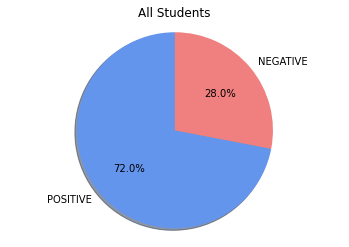

In [58]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = result2.Sentiments.unique()
sizes = result2.Sentiments.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['cornflowerblue', 'lightcoral'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('All Students')

plt.show()

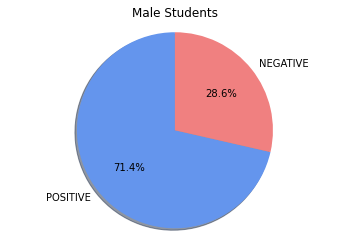

In [59]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = result3.Sentiments.unique()
sizes = result3.Sentiments.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['cornflowerblue', 'lightcoral'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Male Students')

plt.show()

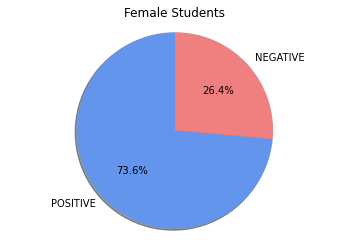

In [60]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = result4.Sentiments.unique()
sizes = result4.Sentiments.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['cornflowerblue', 'lightcoral'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Female Students')
plt.show()

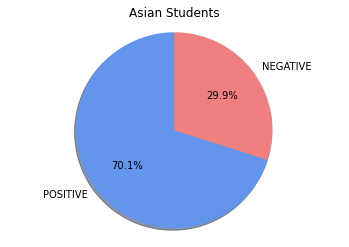

In [61]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Asian.Sentiments.unique()
sizes = Asian.Sentiments.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['cornflowerblue', 'lightcoral'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Asian Students')

plt.show()

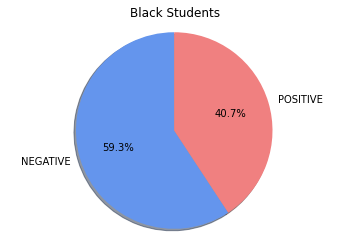

In [62]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Black.Sentiments.unique()
sizes = Black.Sentiments.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['cornflowerblue', 'lightcoral'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Black Students')

plt.show()

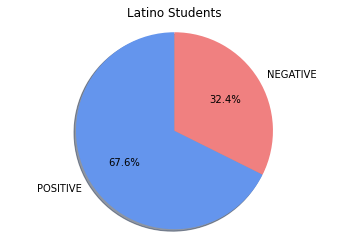

In [63]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Latino.Sentiments.unique()
sizes = Latino.Sentiments.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['cornflowerblue', 'lightcoral'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Latino Students')

plt.show()

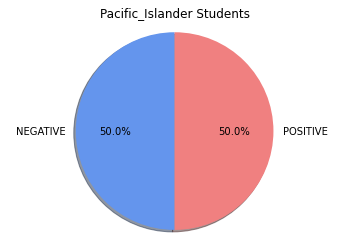

In [64]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Pacific_Islander.Sentiments.unique()
sizes = Pacific_Islander.Sentiments.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['cornflowerblue', 'lightcoral'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pacific_Islander Students')

plt.show()

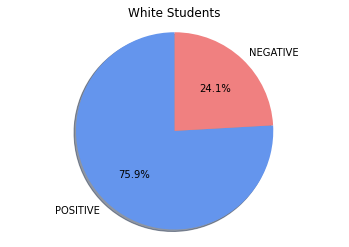

In [65]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = NonHispanic_White.Sentiments.unique()
sizes = NonHispanic_White.Sentiments.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['cornflowerblue', 'lightcoral'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('White Students')

plt.show()

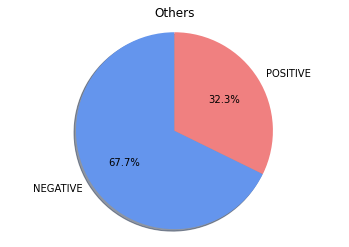

In [66]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Other_race.Sentiments.unique()
sizes = Other_race.Sentiments.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['cornflowerblue', 'lightcoral'], shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Others')

plt.show()

Reference:https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c